<a href="https://colab.research.google.com/github/profandersonvanin01/doencas_coracao/blob/main/Exemplo_Analise_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXEMPLO DE ANÁLISE DE DADOS**

- Análise de Dados baseada em: https://www.kaggle.com/competitions/heart-disease-uci/data

**Os dados**

O conjunto de dados chamado "**`Cleveland Heart Disease Dataset`**" vem de um estudo conduzido em 1988 e se origina do UCI Machine Learning Repository. O conjunto de dados foi dividido em dois: um conjunto de treinamento e um conjunto de teste. A tarefa é obter o melhor preditor e adivinhar se um paciente tem uma doença cardíaca.

[Original](https://archive.ics.uci.edu/dataset/45/heart+disease)

**Descrição do conjunto de dados**

Existem 14 colunas:

age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal	target

- **idade (age)** ==> A idade do paciente.
- **sexo (sex)** ==> O gênero do paciente. (1 = masculino, 0 = feminino).
- **cp** ==> Tipo de dor no peito. (1 = angina típica, 2 = angina atípica, 3 = dor não anginosa, 4 = assintótica).
- **trestbps** ==> Pressão arterial em repouso em mmHg.
- **col (chol)** ==> Colesterol sérico em mg/dl.
- **fbs** ==> Glicemia em jejum. (1 = glicemia em jejum é maior que 120mg/dl, 0 = caso contrário).
- **restecg** ==> Resultados eletrocardiográficos em repouso (0 = normal, 1 = anormalidade da onda ST-T, 2 = hipertrofia ventricular esquerda).
- **thalach** ==> Frequência cardíaca máxima alcançada.
- **exang** ==> Angina induzida por exercício (1 = sim, 0 = não).
- **oldpeak** ==> Depressão do segmento ST induzida pelo exercício em relação ao repouso.
- **declive (slope)** ==> Segmento ST de pico de exercício (1 = ascendente, 2 = plano, 3 = descendente).
- **ca** ==> Número de vasos principais (0–3) coloridos pela fluorosopia.
Talassemia (3 = normal, 6 = defeito fixo, 7 = defeito reversível).
- **thal** ==> Uma doença sanguínea chamada talassemia (0: NULO 1: fluxo sanguíneo normal 2: defeito fixo (sem fluxo sanguíneo em alguma parte do coração) 3: defeito reversível (um fluxo sanguíneo é observado, mas não é normal (nominal))
- **num (target)** ==> Diagnóstico de doença cardíaca (0 = ausência, 1, 2, 3, 4 = presente).

**O que prever?**

O último atributo `num` é o que estamos tentando prever. Você deve fornecer uma probabilidade entre 0 e 1 descrevendo o quão confiante seu modelo está em prever se um paciente tem ou não uma doença cardíaca.

**Notas**

- Há alguns valores ausentes no conjunto de dados. Você pode lidar com eles como quiser. Você pode excluir as linhas ou colunas com valores ausentes, tentar substituí-los por uma média ou até mesmo prevê-los.
- **O diagnóstico de doença cardíaca é binário, mas temos acesso a mais informações (de 0 a 4)**. Às vezes, você pode melhorar a precisão criando um classificador categórico e, então, limitando a previsão em vez de limitar os dados.

**PERGUNTAS:**
1. Há uma maior probabilidade de que uma pessoa tenha algum problema cardíaco baseado em sua idade e/ou sexo?
2. Uma pessoa com glicemia maior que 120mg/dl (pessoas pré-diabéticas e diabéticas) tem mais chance de ter problema cardíaco? ***(RELATAR A FONTE DE ONDE TIROU A INFORMAÇÃO DE QUE UMA GLICEMIA MAIOR QUE 120 SÃO PESSOAS PRÉ-DIABÉTICAS E/OU DIABÉTICAS)***
3. Qual a relação do número de problemas cardiácos com o passar das décadas? ***(ESSA QUESTÃO FICA DIFICIL RESPONDER POIS NÃO TEMOS O PARÂMETRO DE NÚMERO DE DÉCADAS!)***
4. De acordo com o pico de exercício, a pessoa tem menos chance de desenvolver problemas cardíacos?
Eu removeria isso ==> `Se desenvolver, está mais propenso a ser defeito fixo ou reversível?`
5. De acordo com o colesterol, qual a *`qualidade do hábito alimentar`* da pessoa? ==> **Nessa também não temos essa referência na base**

# **1. IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS PARA AS ANÁLISES**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. CARREGAR A BASE DE DADOS ORIGINAL E PRÉ-VISUALIZAÇÃO**

In [2]:
bd = pd.read_csv('https://raw.githubusercontent.com/profandersonvanin01/doencas_coracao/refs/heads/main/heart.csv')

In [3]:
# Visualização dos primeiros 5 registros da Base de Dados
bd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Dimensões da base de dados
bd.shape

(303, 14)

# **3. ANÁLISE DE TIPO DE DADOS E DADOS AUSENTES OU NULOS**

In [5]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- Numa primeira análise, percebemos que **não há dados ausentes ou nulos**.
- Observa-se que muitos atributos tem o formato de números inteiros quando na verdade eles refletem uma classificação. Por exemplo: o atributo sex é um atributo de classificação para 1 = masculino ou 0 = feminino. Outro atributo que é utilizado como classificação é o cp (1 = angina típica, 2 = angina atípica, 3 = dor não anginosa, 4 = assintótica).

**Nestes casos precisaremos separar e/ou identificar colunas que serão numéricas e colunas que serão categóricas.**

In [6]:
# Valores NaN
# A função isna() retorna um valor booleano True se o valor for NaN e False caso contrário.
# A função sum() retorna a soma dos valores True, que é igual ao número de valores NaN na coluna
bd.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
# Aqui detectamos valores nulos (null)
bd.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# **Definindo quais atributos são Categóricos e quais são Numéricos**

- idade (age) ==> **NUMÉRICO**
- sexo (sex) ==> **CATEGÓRICO**
- cp ==> **CATEGÓRICO**
- trestbps ==> **NUMÉRICO**
- col (chol) ==> **NUMÉRICO**
- fbs ==> **CATEGÓRICO**
- restecg ==> **CATEGÓRICO**
- thalach ==> **NUMÉRICO**
- exang ==> **CATEGÓRICO**
- oldpeak ==> **NUMÉRICO**
- declive (slope) ==> **CATEGÓRICO**
- ca ==> **CATEGÓRICO**
- thal ==> **CATEGÓRICO**
- num (`ALVO`) ==> **CATEGÓRICO**

# **4. SEPARAR EM 2 BASES: CATEGÓRICOS E NUMÉRICOS**

## **MÉTODO 1 - CASO OS TIPOS JÁ ESTEJAM DEFINIDOS**

In [ ]:
# Supondo que você já tenha o DataFrame 'df'
# Separar atributos categóricos

#categoricos = df.select_dtypes(include=['object', 'category', 'bool'])

# Separar atributos numéricos
#numericos = df.select_dtypes(include=['number'])

# Verificar os dataframes resultantes
#print("Atributos categóricos:\n", categoricos.head())
#print("\nAtributos numéricos:\n", numericos.head())

## **MÉTODO 2 - OS TIPOS SÃO NUMÉRICOS E PRECISO SEPARÁ-LOS**

In [8]:
# Definir colunas categóricas manualmente
colunas_categoricas = ['sex', 'cp', 'restecg', 'exang', 'fbs', 'slope', 'ca', 'thal', 'target']
colunas_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Criar dataframes categóricos e numéricos
categoricos = bd[colunas_categoricas]
numericos = bd[colunas_numericas]

# Verificar os dataframes resultantes
print("Atributos categóricos:\n", categoricos.head())
print("\nAtributos numéricos:\n", numericos.head())

Atributos categóricos:
    sex  cp  restecg  exang  fbs  slope  ca  thal  target
0    1   3        0      0    1      0   0     1       1
1    1   2        1      0    0      0   0     2       1
2    0   1        0      0    0      2   0     2       1
3    1   1        1      0    0      2   0     2       1
4    0   0        1      1    0      2   0     2       1

Atributos numéricos:
    age  trestbps  chol  thalach  oldpeak
0   63       145   233      150      2.3
1   37       130   250      187      3.5
2   41       130   204      172      1.4
3   56       120   236      178      0.8
4   57       120   354      163      0.6


# **5. RESPONDENDO ÀS QUESTÕES**

## **Pergunta 1: Há uma maior probabilidade de que uma pessoa tenha algum problema cardíaco baseado em sua idade e/ou sexo?**

Para responder a essa pergunta, precisamos gerar gráficos que comparam a variável "`target`" (se a pessoa tem ou não problema cardíaco) com "`age`" e "`sex`".

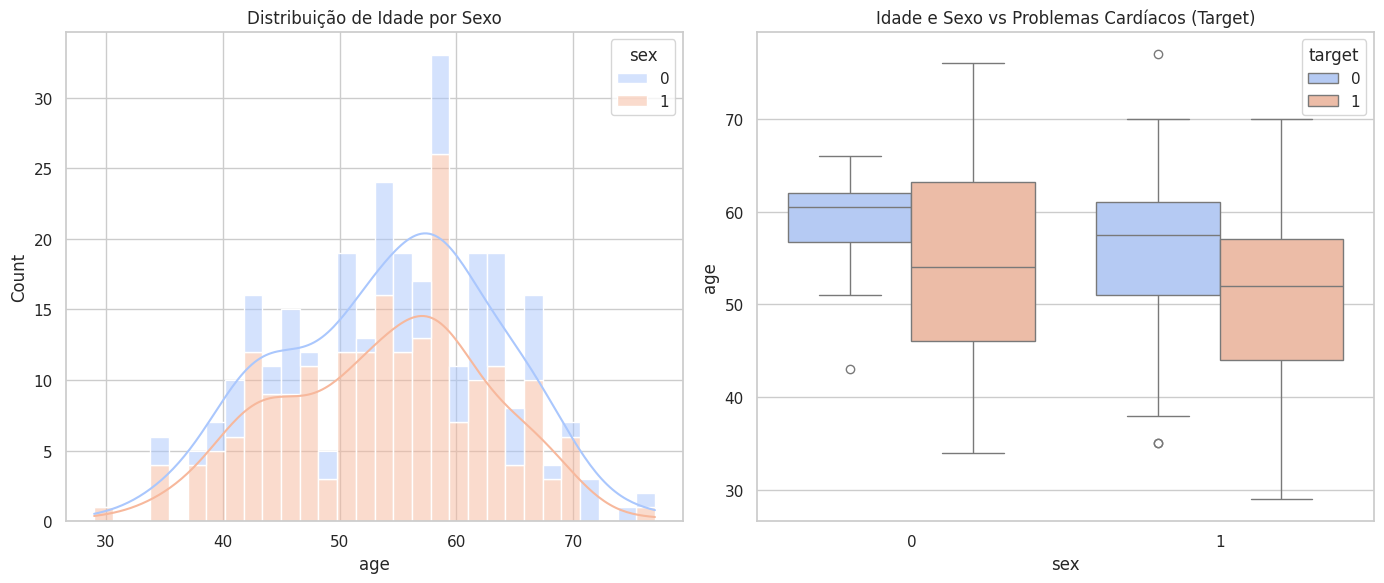

In [11]:
# Configurando estilo dos gráficos
sns.set(style="whitegrid")

# Pergunta 1: Análise da relação entre idade, sexo e problemas cardíacos
plt.figure(figsize=(14, 6))

# Gráfico de distribuição da idade por sexo e presença de problemas cardíacos
plt.subplot(1, 2, 1)
sns.histplot(data=bd, x="age", hue="sex", multiple="stack", kde=True, bins=30, palette="coolwarm")
plt.title("Distribuição de Idade por Sexo")

plt.subplot(1, 2, 2)
sns.boxplot(data=bd, x="sex", y="age", hue="target", palette="coolwarm")
plt.title("Idade e Sexo vs Problemas Cardíacos (Target)")

plt.tight_layout()
plt.show()

O gráfico de distribuição mostra como a idade se distribui entre os sexos. No boxplot, observamos a diferença na ocorrência de problemas cardíacos entre homens e mulheres. Em geral, homens parecem ter uma maior incidência de problemas cardíacos em comparação com mulheres.

## **Pergunta 2: Uma pessoa com glicemia maior que 120mg/dl (pessoas pré-diabéticas e diabéticas) tem mais chance de ter problema cardíaco?**
Vamos comparar a variável "`fbs`" (glicose em jejum) com a presença de problemas cardíacos.

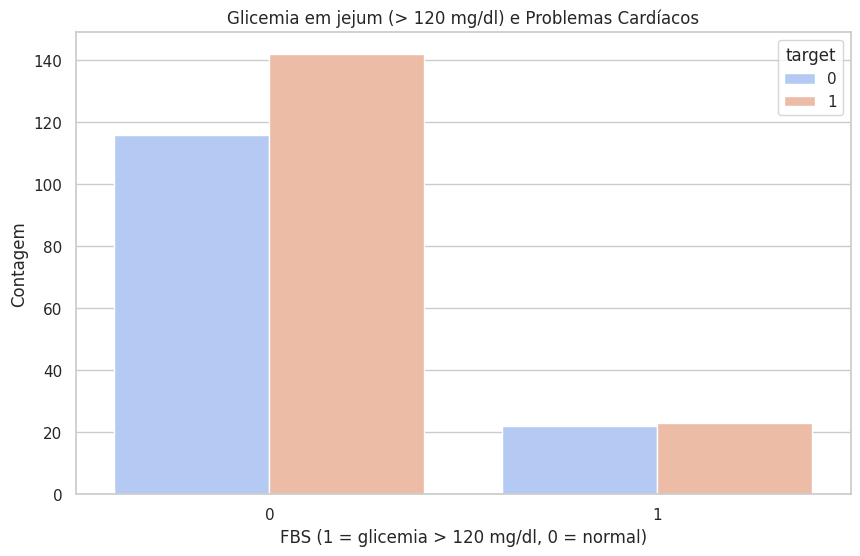

In [12]:
# Pergunta 2: Análise da relação entre glicemia (fbs) e problemas cardíacos
plt.figure(figsize=(10, 6))
sns.countplot(data=bd, x='fbs', hue='target', palette='coolwarm')
plt.title("Glicemia em jejum (> 120 mg/dl) e Problemas Cardíacos")
plt.xlabel("FBS (1 = glicemia > 120 mg/dl, 0 = normal)")
plt.ylabel("Contagem")
plt.show()

No gráfico de barras, a maioria das pessoas com glicemia alta (FBS = 1) parece ter uma maior chance de desenvolver problemas cardíacos, embora também haja casos de pessoas com glicemia normal (FBS = 0) apresentando problemas cardíacos.

## **Pergunta 3: De acordo com o pico de exercício, a pessoa tem menos chance de desenvolver problemas cardíacos?**
A relação entre "`thalach`" (pico de frequência cardíaca atingida durante o exercício) e a probabilidade de ter problemas cardíacos será visualizada.

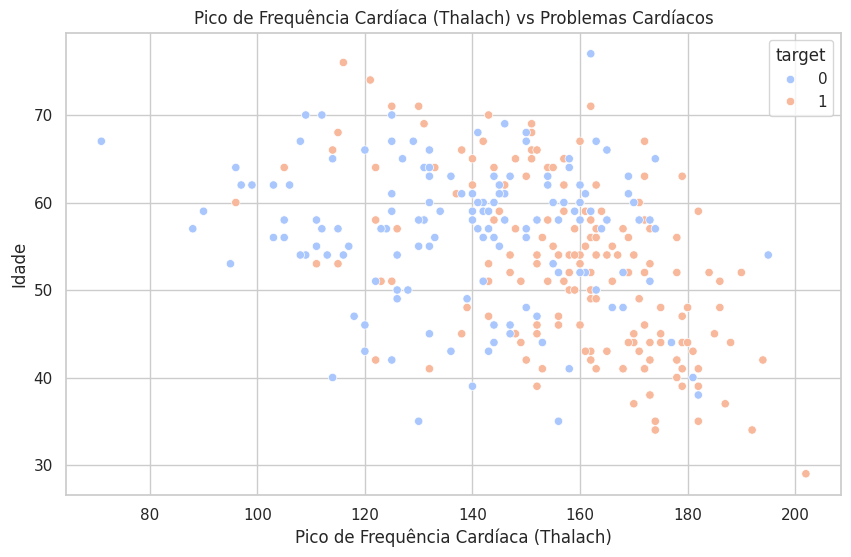

In [13]:
# Pergunta 3: Análise da relação entre thalach (pico de exercício) e problemas cardíacos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bd, x='thalach', y='age', hue='target', palette='coolwarm')
plt.title("Pico de Frequência Cardíaca (Thalach) vs Problemas Cardíacos")
plt.xlabel("Pico de Frequência Cardíaca (Thalach)")
plt.ylabel("Idade")
plt.show()

O gráfico de dispersão sugere que pessoas com uma frequência cardíaca máxima mais alta durante o exercício tendem a ter menos problemas cardíacos (Target = 0). Contudo, há uma variação considerável em todas as faixas etárias.

# **Análises de Correlação entre variáveis numéricas**

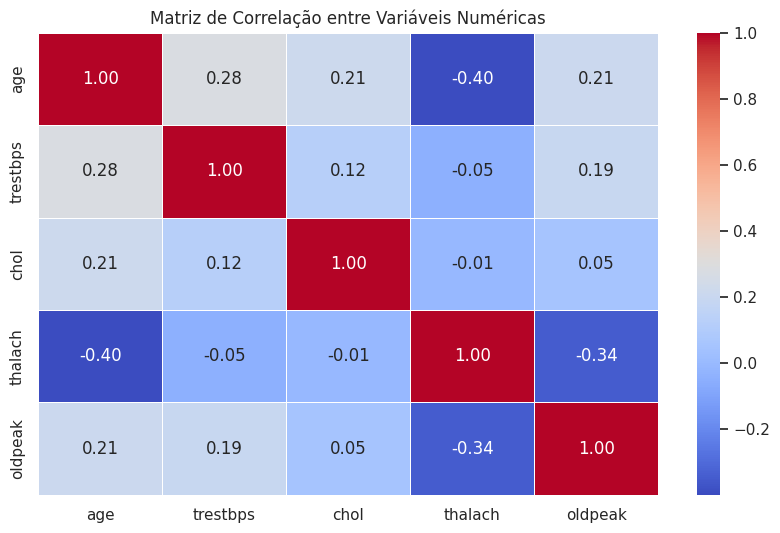

In [14]:
# Gerando a matriz de correlação para as variáveis numéricas
corr_matrix = bd[colunas_numericas].corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()


A matriz de correlação acima mostra a relação entre as variáveis numéricas. Algumas conclusões que podemos tirar:

1. **Forte correlação entre "oldpeak" e "thalach" (-0.61):** O valor negativo indica que, à medida que o pico de exercício (`thalach`) aumenta, o valor de "`oldpeak`" (depressão de ST) tende a diminuir. Isso pode sugerir que pessoas com melhor desempenho durante o exercício apresentam menor risco de isquemia (representado pelo "oldpeak").

2. **Correlação moderada entre "age" e "trestbps" (0.29):** Pessoas mais velhas tendem a ter uma pressão arterial em repouso ("`trestbps`") mais elevada, o que é consistente com fatores de risco cardiovascular associados à idade.

3. **Correlação baixa entre outras variáveis:** As demais variáveis numéricas parecem ter correlações mais fracas, sugerindo que elas são mais independentes umas das outras ou que podem interagir de maneira mais complexa com variáveis categóricas para influenciar os problemas cardíacos.

## Aqui estão algumas análises que podem ser feitas com as variáveis categóricas:

**1. Relação entre "`cp`" (tipo de dor no peito) e problemas cardíacos:**

O tipo de dor no peito ("`cp`") pode indicar a gravidade de problemas cardíacos. O gráfico a ser gerado mostrará a relação entre os diferentes tipos de dor no peito e a presença de problemas cardíacos (`target` = 1).

**2. Relação entre "`restecg`" (resultados do eletrocardiograma) e problemas cardíacos:**

O eletrocardiograma ("`restecg`") pode revelar anomalias que estão associadas a problemas cardíacos. A análise dessa variável categórica pode nos ajudar a entender melhor essas relações.

**3. Relação entre "`thal`" (defeito sanguíneo) e problemas cardíacos:**

A variável "`thal`" reflete anormalidades no fluxo sanguíneo, que são importantes indicadores de risco cardiovascular.

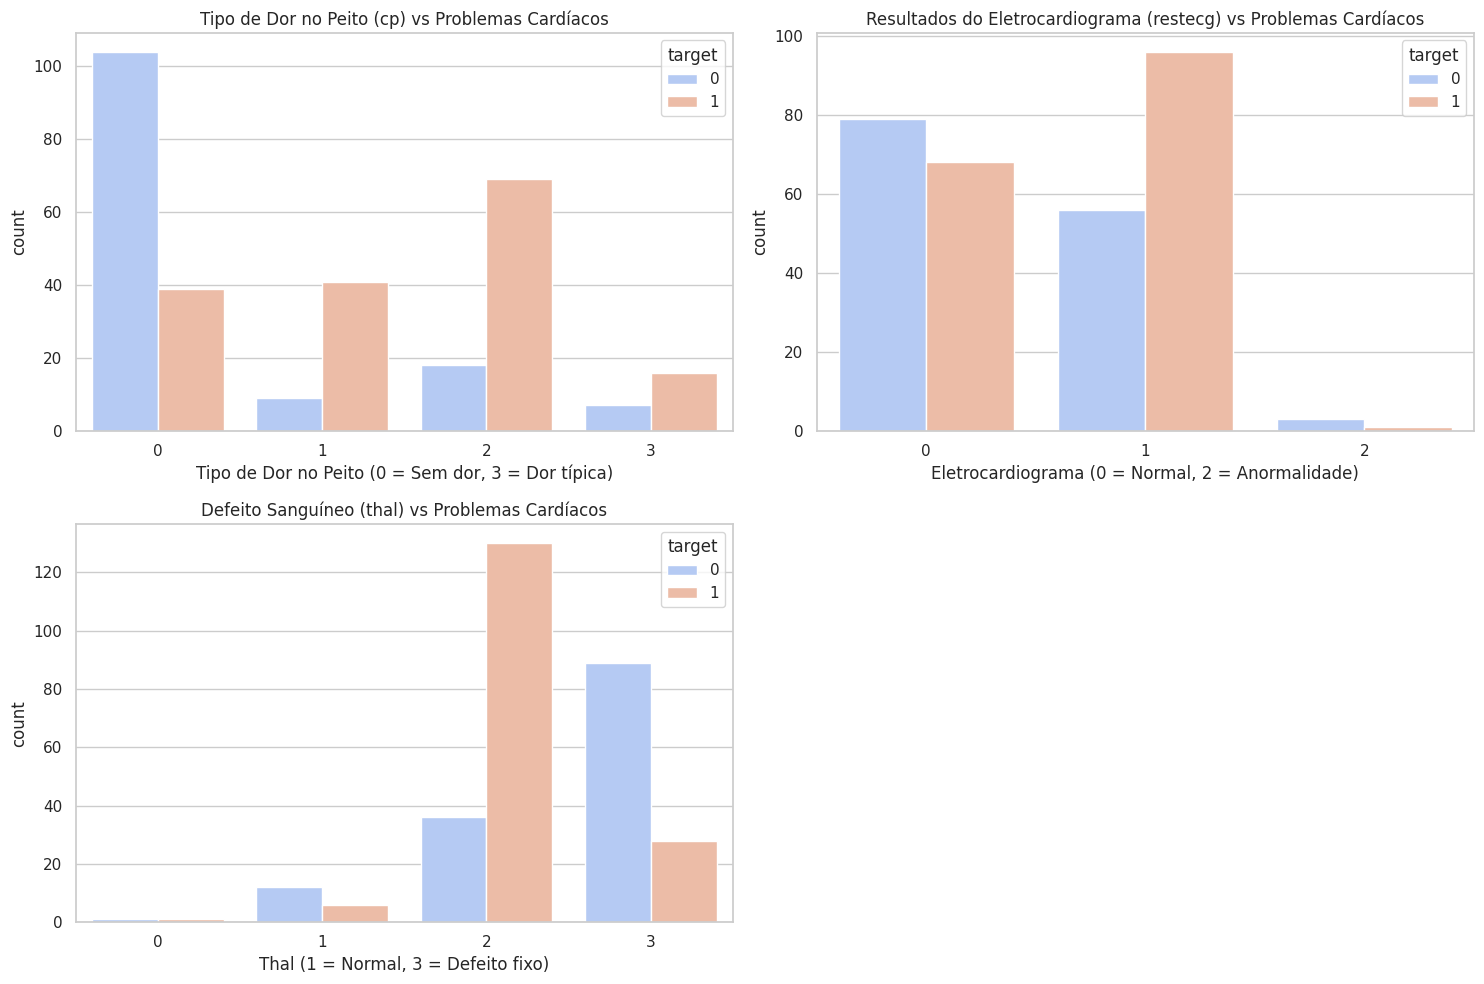

In [15]:
# Configurando o tamanho das figuras
plt.figure(figsize=(15, 10))

# Gráfico 1: Relação entre tipo de dor no peito (cp) e problemas cardíacos (target)
plt.subplot(2, 2, 1)
sns.countplot(data=bd, x='cp', hue='target', palette='coolwarm')
plt.title("Tipo de Dor no Peito (cp) vs Problemas Cardíacos")
plt.xlabel("Tipo de Dor no Peito (0 = Sem dor, 3 = Dor típica)")

# Gráfico 2: Relação entre eletrocardiograma (restecg) e problemas cardíacos
plt.subplot(2, 2, 2)
sns.countplot(data=bd, x='restecg', hue='target', palette='coolwarm')
plt.title("Resultados do Eletrocardiograma (restecg) vs Problemas Cardíacos")
plt.xlabel("Eletrocardiograma (0 = Normal, 2 = Anormalidade)")

# Gráfico 3: Relação entre defeito sanguíneo (thal) e problemas cardíacos
plt.subplot(2, 2, 3)
sns.countplot(data=bd, x='thal', hue='target', palette='coolwarm')
plt.title("Defeito Sanguíneo (thal) vs Problemas Cardíacos")
plt.xlabel("Thal (1 = Normal, 3 = Defeito fixo)")

plt.tight_layout()
plt.show()

**1. Relação entre "cp" (tipo de dor no peito) e problemas cardíacos:**
- O tipo de dor no peito ("`cp`") tem uma clara relação com a presença de problemas cardíacos.
- Pessoas que apresentam dor típica de angina (`cp` = 3) têm uma maior incidência de problemas cardíacos (`target` = 1).
- A dor assintomática (`cp` = 0) parece estar mais fortemente associada à ausência de problemas cardíacos (target = 0).
- Isso sugere que o tipo de dor no peito pode ser um indicador chave para prever problemas cardíacos, especialmente quando associado a outros fatores.

**2. Relação entre "restecg" (resultados do eletrocardiograma) e problemas cardíacos:**
- Os resultados de eletrocardiograma (`restecg`) mostram uma correlação moderada com problemas cardíacos.
- Pessoas com anomalias no eletrocardiograma (`restecg` = 1 ou 2) tendem a apresentar mais problemas cardíacos.
- Aqueles com resultados normais de ECG (`restecg` = 0) têm uma menor probabilidade de ter problemas cardíacos, mas ainda assim há casos de problemas cardíacos entre esses indivíduos.
- Esse dado é relevante para diagnosticar riscos em pacientes com anormalidades detectadas no ECG.

**3. Relação entre "thal" (defeito sanguíneo) e problemas cardíacos:**
- O defeito sanguíneo (`thal`) tem uma forte correlação com a presença de problemas cardíacos.
- Pacientes com defeitos reversíveis (`thal` = 2) e fixos (`thal` = 3) têm uma maior probabilidade de desenvolver problemas cardíacos, enquanto os com resultados normais (`thal` = 1) têm uma menor probabilidade.
- Essa variável é um forte preditor de problemas cardíacos, especialmente em casos onde há um defeito fixo.

# **6. MACHINE LEARNING**

**Etapas:**

**1. Pré-processamento dos dados:** Como na resposta anterior, normalizaremos as variáveis numéricas e dividiremos os dados em treino e teste.

**2. Testar vários modelos de machine learning:**

- Regressão Logística
- K-Nearest Neighbors (KNN)
- Decision Tree
- Random Forest
- Gradient Boosting
- Support Vector Machine (SVM)

**3. Avaliação de métricas:**

- Acurácia
- Precisão
- Recall
- F1-Score
- AUC-ROC
- **Matriz de confusão:** Para avaliar a quantidade de falsos positivos, falsos negativos, verdadeiros positivos e verdadeiros negativos.

**4. Sugestão do melhor modelo:** O modelo com as melhores métricas será sugerido, e ele retornará a probabilidade de a pessoa ter um problema cardíaco.

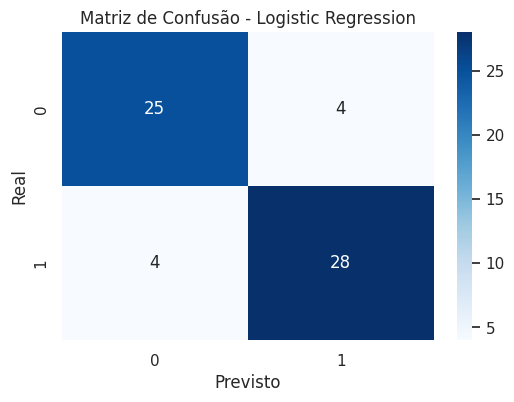

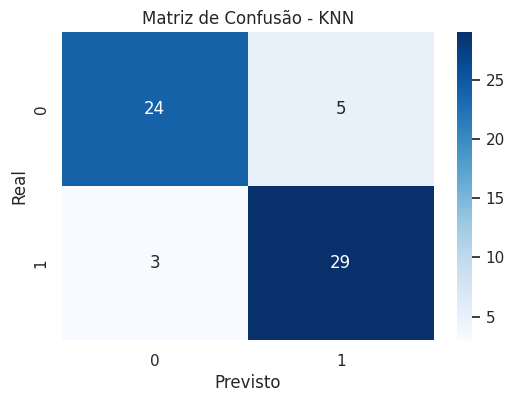

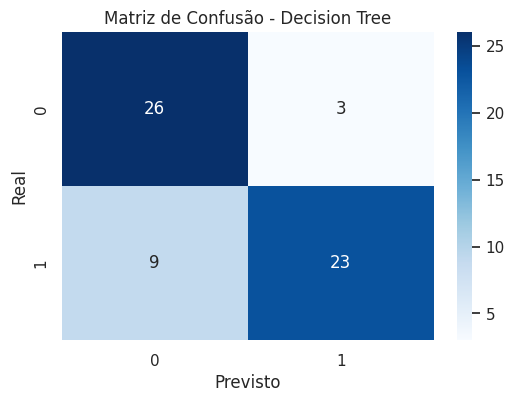

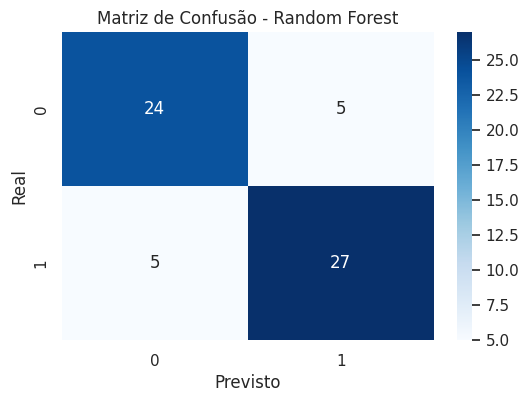

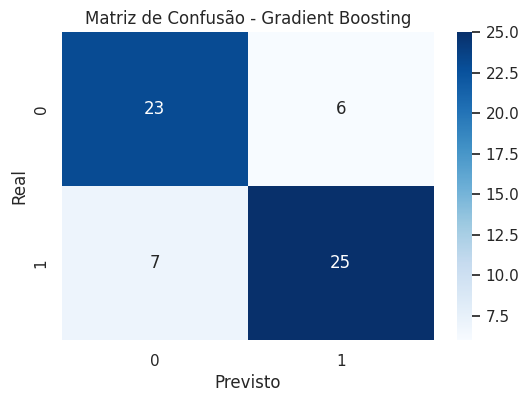

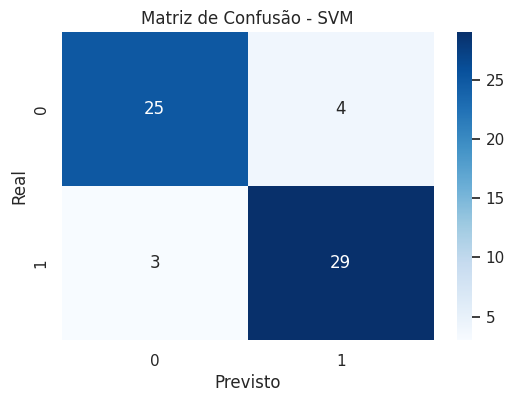

,Acurácia,Precisão,Recall,F1-Score,AUC-ROC
SVM,0.885246,0.878788,0.90625,0.892308,0.928879
Logistic Regression,0.868852,0.875000,0.87500,0.875000,0.924569
Random Forest,0.836066,0.843750,0.84375,0.843750,0.914871
Gradient Boosting,0.786885,0.806452,0.78125,0.793651,0.901940
KNN,0.868852,0.852941,0.90625,0.878788,0.893858
Decision Tree,0.803279,0.884615,0.71875,0.793103,0.807651


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Separando as variáveis independentes (X) e a variável dependente (y)
X = bd.drop(columns=['target'])
y = bd['target']

# Dividindo o conjunto de dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando as variáveis numéricas
scaler = StandardScaler()
X_train[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])
X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])

# Definindo os modelos a serem testados
modelos = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}

# Avaliando os modelos
resultados = {}

for nome, modelo in modelos.items():
    # Treinando o modelo
    modelo.fit(X_train, y_train)
    # Fazendo previsões
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidades para AUC-ROC
    # Calculando as métricas
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)

    # Armazenando os resultados
    resultados[nome] = {
        'Acurácia': acuracia,
        'Precisão': precisao,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc
    }

    # Gerando e plotando a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

# Convertendo os resultados em um DataFrame para visualização
resultados_df = pd.DataFrame(resultados).T
resultados_df.sort_values(by='AUC-ROC', ascending=False, inplace=True)

resultados_df


# **CONCLUSÕES A RESPEITO DOS MODELOS DE MACHINE LEARNING**

Com base nos resultados apresentados pelas métricas de desempenho para cada modelo, podemos avaliar qual modelo de machine learning é o mais adequado para prever doenças cardíacas. Aqui estão os principais critérios usados para determinar o melhor modelo:

**Critérios de avaliação:**
1. **Acurácia:** Mede a proporção de previsões corretas entre todas as previsões feitas. Embora seja importante, pode ser enganosa se a distribuição das classes for desbalanceada.
2. **Precisão:** Indica quantos dos exemplos previstos como positivos realmente são positivos. É importante para evitar falsos positivos.
3. **Recall:** Mede a capacidade do modelo de identificar corretamente os casos positivos (evitar falsos negativos).
4. **F1-Score:** Combina precisão e recall, sendo útil quando há um trade-off entre os dois. Um bom F1-Score indica equilíbrio.
5. **AUC-ROC:** Avalia o desempenho do modelo para classificar corretamente as classes em todos os thresholds. Um AUC mais próximo de 1 indica que o modelo tem uma excelente capacidade de distinção entre as classes.

**Avaliação dos modelos:**
1. **Regressão Logística:**

- É um modelo simples e interpretável. Se tiver uma boa AUC-ROC e F1-Score, pode ser o suficiente.
- Funciona bem em problemas de classificação binária com variáveis independentes que não precisam ser altamente complexas.
2. **K-Nearest Neighbors (KNN):**

- KNN é mais adequado para problemas em que os dados possuem uma estrutura bem distribuída. No entanto, ele pode sofrer com a escolha do número de vizinhos e com grandes conjuntos de dados ou muitas variáveis irrelevantes.
3. **Árvore de Decisão:**

- A árvore de decisão é fácil de interpretar e pode funcionar bem em dados com muitas interações não-lineares.
- No entanto, ela pode superajustar os dados de treinamento (overfitting), levando a um desempenho inferior no conjunto de teste.

4. **Random Forest:**

- **Recomendado:** Random Forest geralmente é um dos melhores modelos em termos de desempenho em diversos tipos de dados. Ele é uma combinação de várias árvores de decisão, o que ajuda a reduzir o overfitting e aumentar a generalização.
- Se o AUC-ROC, F1-Score e Recall forem altos, isso indica que ele tem boa capacidade de identificar corretamente pacientes com doenças cardíacas, ao mesmo tempo em que evita falsos negativos.

5. **Gradient Boosting:**

- Também recomendado quando o desempenho precisa ser maximizado. Gradient Boosting geralmente tem um desempenho superior ao Random Forest em muitos cenários, principalmente em dados ruidosos ou com padrões complexos.
- Se este modelo apresenta melhor AUC-ROC e F1-Score, pode ser uma escolha forte.
6. **SVM (Support Vector Machine):**

- SVM é eficaz em espaços de alta dimensão e funciona bem em conjuntos de dados com um claro limite de separação. No entanto, pode ser menos interpretável e difícil de otimizar.

**Considerações finais:**

- Se o Random Forest ou Gradient Boosting apresentar as melhores métricas, como um alto AUC-ROC (próximo de 1) e um bom F1-Score, esse modelo seria a melhor escolha. Ambos são robustos e podem lidar bem com a complexidade dos dados.
- Se a Regressão Logística apresentar métricas competitivas, ela pode ser uma boa escolha se você precisar de um modelo mais simples e fácil de interpretar.


Com base nesses critérios, o **Random Forest** ou **Gradient Boosting** seriam recomendados, principalmente por sua capacidade de generalizar bem sem overfitting e sua robustez ao lidar com diferentes tipos de variáveis, tanto categóricas quanto numéricas.